In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

A ***Convolution*** is defined as the integral of the product of two functions after one is *reflected* about the $y$-axis:
$$(f \ast g)(x) \coloneqq \int_{-\infty}^{\infty} f(x)g(x-y)dy$$

## Discrete Case

Motivating example: outcomes from rolling a pair of dice.\
There are $6^2 = 36$ possible combinations from rolling a pair of dice. However, there are only $11$ possible sums that can result from any row - see the matrix below:

In [2]:
d = np.array([1, 2, 3, 4, 5, 6])
dd = np.array([int(i + j )for i in d for j in d]).reshape(6, 6)
print(dd)

[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


Note how many ways each number may be achieved:

In [3]:
counts = {int(n) : int((dd == n).sum()) for n in np.unique(dd)}
pprint(counts)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


Another way of achieving these combinations is to pass the series of numbers achievable by rolling one die over the reversed series of numbers achievable by rolling the other die:

In [4]:
d = np.array([1, 2, 3, 4, 5, 6])
b = np.array([6, 5, 4, 3, 2, 1])  # b is a backwards d, get it?
for i in range(1, 12):
    if i <= 6:
        print('d: ', d[:i])
        print('b: ', b[-i:])
        print(f'  = {d[:i][0] + b[-i:][0]}  --  {len(d[:i])} ways  -- p({d[:i][0] + b[-i:][0]}) = {len(d[:i])} / 36')
    else:
        print('d: ', d[i-6:])
        print('b: ', b[:-(i-6)])
        print(f'  = {d[i-6:][0] + b[:-(i-6)][0]}  --  {len(d[i-6:])} ways  -- p({d[i-6:][0] + b[:-(i-6)][0]}) = {len(d[i-6:])} / 36')

d:  [1]
b:  [1]
  = 2  --  1 ways  -- p(2) = 1 / 36
d:  [1 2]
b:  [2 1]
  = 3  --  2 ways  -- p(3) = 2 / 36
d:  [1 2 3]
b:  [3 2 1]
  = 4  --  3 ways  -- p(4) = 3 / 36
d:  [1 2 3 4]
b:  [4 3 2 1]
  = 5  --  4 ways  -- p(5) = 4 / 36
d:  [1 2 3 4 5]
b:  [5 4 3 2 1]
  = 6  --  5 ways  -- p(6) = 5 / 36
d:  [1 2 3 4 5 6]
b:  [6 5 4 3 2 1]
  = 7  --  6 ways  -- p(7) = 6 / 36
d:  [2 3 4 5 6]
b:  [6 5 4 3 2]
  = 8  --  5 ways  -- p(8) = 5 / 36
d:  [3 4 5 6]
b:  [6 5 4 3]
  = 9  --  4 ways  -- p(9) = 4 / 36
d:  [4 5 6]
b:  [6 5 4]
  = 10  --  3 ways  -- p(10) = 3 / 36
d:  [5 6]
b:  [6 5]
  = 11  --  2 ways  -- p(11) = 2 / 36
d:  [6]
b:  [6]
  = 12  --  1 ways  -- p(12) = 1 / 36


This function of passing one series of numbers over the other *is a convolution*

Now, let's assume that these a *loaded dice* an see what happens to the *probabilities* of each pair of outcomes (i.e. of achieving each sum):

In [5]:
# introduce probability weights
dp = np.array([0.16, 0.21, 0.17, 0.16, 0.12, 0.18])
bp = np.array([0.13, 0.2, 0.1, 0.24, 0.22, 0.11])

dpbp_conv = []
for i in range(1, 12):
    if i <= 6:
        print('d*p: ', dp[:i])
        print('b*p: ', bp[-i:])
        p = float((dp[:i] * bp[-i:]).sum())
        print(f"p(d + b) = {i} = {p:.4f}")
    else:
        print('d: ', dp[i-6:])
        print('b: ', bp[:-(i-6)])
        p = float((dp[i-6:] * bp[:-(i-6)]).sum())
        print(f"p(d + b) = {i} = {p:.4f}")
    dpbp_conv.append(p)

d*p:  [0.16]
b*p:  [0.11]
p(d + b) = 1 = 0.0176
d*p:  [0.16 0.21]
b*p:  [0.22 0.11]
p(d + b) = 2 = 0.0583
d*p:  [0.16 0.21 0.17]
b*p:  [0.24 0.22 0.11]
p(d + b) = 3 = 0.1033
d*p:  [0.16 0.21 0.17 0.16]
b*p:  [0.1  0.24 0.22 0.11]
p(d + b) = 4 = 0.1214
d*p:  [0.16 0.21 0.17 0.16 0.12]
b*p:  [0.2  0.1  0.24 0.22 0.11]
p(d + b) = 5 = 0.1422
d*p:  [0.16 0.21 0.17 0.16 0.12 0.18]
b*p:  [0.13 0.2  0.1  0.24 0.22 0.11]
p(d + b) = 6 = 0.1644
d:  [0.21 0.17 0.16 0.12 0.18]
b:  [0.13 0.2  0.1  0.24 0.22]
p(d + b) = 7 = 0.1457
d:  [0.17 0.16 0.12 0.18]
b:  [0.13 0.2  0.1  0.24]
p(d + b) = 8 = 0.1093
d:  [0.16 0.12 0.18]
b:  [0.13 0.2  0.1 ]
p(d + b) = 9 = 0.0628
d:  [0.12 0.18]
b:  [0.13 0.2 ]
p(d + b) = 10 = 0.0516
d:  [0.18]
b:  [0.13]
p(d + b) = 11 = 0.0234


Now we are summing over the *joint* probabilities of each pair. For example, the probability that we see a $3$ from our roll is:
$$p(d = 1)\times p(b=2) + p(d=2) \times p(b=1) = \sum \big( p(d, b) = 3\big) = 0.21(0.11) + 0.16(0.22) = 0.0583$$

In general, the convolution of two discrete random variables $A$ and $B$ is expressed as:
$$(a \ast b)_n = \sum_{i,j: \ i+j=n} a_i \cdot b_j$$
Where $a_i = P(A=i)$ and $b_i = P(B=i)$

This convolution ***is the probability distribution of the sum of these two random variables***:

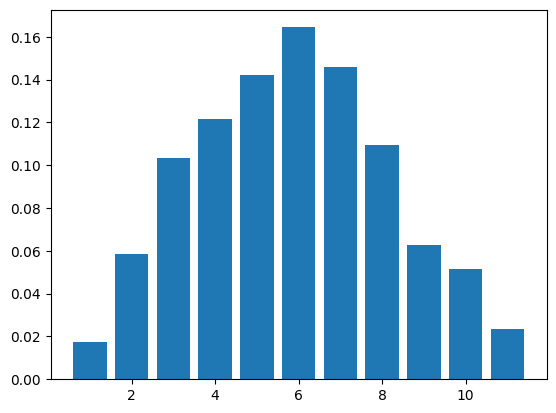

In [6]:
dpbp = np.array([float(i * j )for i in dp for j in bp]).reshape(6, 6) * dd
plt.bar(x=list(range(1, 12)), height=dpbp_conv);

Another useful conceptualization of convolutions is as *moving averages* - moving averages are nothing more than convolutions passed over a series of data.

Can we gain some intuition for why one of the functions in the original convolution definition is reflected? In the discrete case demonstrated using a pair of dice, it kind of makes sense. We sum over all $i, j : \ i + j = n$ to get each probability $P(A + B) = n$. So, one of the random variables *must be decreasing*... \
In general, we want the distribution of probabilities associated with each realization of the random variable $A + B$. Ensuring that one of the component random variables has reflected values ensures that the sum captures each combination of $A$ and $B$ for each realization of $A + B$. This is a start, but I'm not quite grasping the bigger picture...

More generalized expression of the convolution formula:
$$P_{X+Y} = \big[P_X \ast P_Y\big](s) = \sum_{x=1}^s P_X(x) \cdot P_Y(s - x)$$ 
Where $s$ is realization of the random variable $X + Y$.

## Continuous Case

Now, we replace the discrete probability distribution functions with continuous probability density functions:
$$p(x) \ \rightarrow \ f(x) \\ p(y) \ \rightarrow \ g(y)$$
Then the continuous convolution is:
$$[f \ast g](s) = \int_{-\infty}^{\infty} f(x) g(s-x) dx$$

So, at each $s$, the convolution is the area under the function $f(x)$ (i.e. the probability density function of $X$) weighted by $g(-x)$ (i.e. the reflected probability density function of $Y$) shifted by the amount $s$. Again, $s$ is a realization of $X+Y$, so the integral is truly taken over all $x,y$ such that $x + y = s$. Expressing this in terms of $x$ and $s-x$ alone is much more straightforward though.

## Connection to CLT

CLT: The sum of $N$ random variables (which is itself a random variable) converges to a normal distribution as $N$ increases.

As we saw in the discrete case, the convolution between two independent random variables *is* the probability distribution of the sum of the two random variables: $$P_{X+Y} = \big[P_X \ast P_Y\big](s)$$

Thus, the convolution of $N$ random variables converges to a normal distribution as $N$ increases. But there's a bit more to the intuition. Notice that the effect of convolving two random variables is to smooth out there distribution. Indeed, moving averages are convolutions so we are somewhat familiar with this smoothing effect already.

In [45]:
x = np.random.uniform(-1, 1, 10000)  # random draws from uniform distribution
xp = np.array([1/2]*10000)

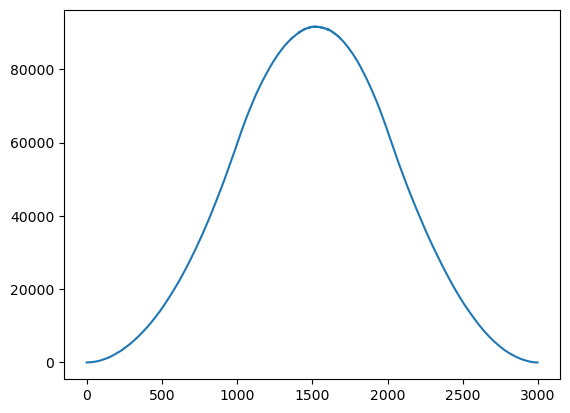

In [63]:
x = np.random.uniform(0, 1, 1000)
y = np.random.uniform(0, 1, 1000)

dists = [np.random.uniform(0, 1, 1000) for i in range(5)]

def convs(dists, n):
    res = dists[0]
    i = 0
    while i < n and i < len(dists):
        i += 1
        res = np.convolve(res, dists[i])
    return res

plt.plot(convs(dists, n=2));

You can play around with this plot, change the list of distributions, `dists`, or the number of convolutions `n` to see how long different distributions take to approximate a normal. Notice that for uniform distributions, we approach normality at `n = 2`

As we evaluate different distributions, the effect of increasing the number of convolutions is to *smooth-out* the distribution of the sum. Effectively, the convolutions are sharing information between the random variables - with equal weighting (i.e. each random variable has a coefficient of 1 in the sum), this reduces the information in the resulting sum. 

Insight for this tendency may be drawn from information theory. When we consider distributions in terms of their information content, or entropy, it can be shown that the normal distribution has the *maximum entropy among all real-valued distributions*. So, the process of smoothing out distributions through convolutions, which decreases their information content and increases their entropy, will naturally trend towards the maximum entropy distribution which is the normal distribution.

This is likely worth fleshing out in the future...

## Resources:
 - 3Blue1Brown videos
    - Discrete Convolutions: https://www.youtube.com/watch?v=KuXjwB4LzSA
    - Continuous Convolutions: https://www.youtube.com/watch?v=IaSGqQa5O-M
- Artem Kirsanov on entropy: https://youtu.be/KHVR587oW8I?si=Z9oQYR_7qVSjHuHr
- More on entropy and CLT: https://mathoverflow.net/questions/182752/central-limit-theorem-via-maximal-entropy
- Maxwell Peterson on CLT via convolutions: https://www.lesswrong.com/posts/6oPe3oqzdJtrWmduR/the-central-limit-theorem-in-terms-of-convolutions
- Chris Olah with more on convolutions: https://colah.github.io/posts/2014-07-Understanding-Convolutions/

Also, apparently an entire book has been written on the subject of the CLT being a result of information theory:
- https://www.worldscientific.com/worldscibooks/10.1142/p341#t=aboutBook